In [1]:
"""
!pip install Augmentor
!pip install pillow
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install keras
!pip install scikit-image
!unzip ./python/images_background.zip
!unzip ./python/images_background_small1.zip
!unzip ./python/images_background_small2.zip
!unzip ./python/images_evaluation.zip
"""
#!tensorboard --logdir=/root/omniglot/logs

'\n!pip install Augmentor\n!pip install pillow\n!pip install pandas\n!pip install matplotlib\n!pip install numpy\n!pip install keras\n!pip install scikit-image\n!unzip ./python/images_background.zip\n!unzip ./python/images_background_small1.zip\n!unzip ./python/images_background_small2.zip\n!unzip ./python/images_evaluation.zip\n'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from load_data import load_directory, train_gen, val_gen, quiz_models, LossTracker
from build_models import make_convnet, make_capsnet, train_convnet, train_capsnet, plot_history
import tensorflow as tf
from keras.models import load_model, Sequential, Model
from keras.layers import Input
from capsulelayers import Length, Mask

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
batch_size = 30
directory = './images_evaluation/Atemayar_Qelisayer/'
train, test, labels = load_directory(directory)
loss_tracker = LossTracker()
tg = train_gen(train, labels, batch_size=batch_size, augmentation=True, loss_obj=loss_tracker)
vg = val_gen(test, labels, batch_size=len(test)) #Use the entire validation set here.

In [4]:
input_shape = (105, 105, 1)
n_class = len(labels)
routings = 3
reconstruction_loss = .392

In [5]:
convnet = make_convnet(input_shape, n_class, width=69, dropout=.5)
convnet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 105, 105, 1)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 97, 97, 69)        5658      
_________________________________________________________________
conv2 (Conv2D)               (None, 93, 93, 138)       238188    
_________________________________________________________________
dropout_1 (Dropout)          (None, 93, 93, 138)       0         
_________________________________________________________________
maxp1 (MaxPooling2D)         (None, 46, 46, 138)       0         
_________________________________________________________________
conv3 (Conv2D)               (None, 45, 45, 138)       76314     
_________________________________________________________________
conv4 (Conv2D)               (None, 44, 44, 276)       152628    
__________

In [6]:
history = train_convnet(convnet, tg, vg, directory, verbose=True, loss_obj=loss_tracker, epochs=10)

Epoch 1/10
100/100 [==============================] - 17s 173ms/step - loss: 3.2579 - categorical_accuracy: 0.0400 - val_loss: 3.2581 - val_categorical_accuracy: 0.0385

Epoch 00001: val_categorical_accuracy improved from -inf to 0.03846, saving model to ./models/images_evaluation/Atemayar_Qelisayer/best_acc.h5

Epoch 00001: val_loss improved from inf to 3.25811, saving model to ./models/images_evaluation/Atemayar_Qelisayer/best_loss.h5
Epoch 2/10
100/100 [==============================] - 13s 132ms/step - loss: 3.2585 - categorical_accuracy: 0.0357 - val_loss: 3.2581 - val_categorical_accuracy: 0.0385

Epoch 00002: val_categorical_accuracy did not improve from 0.03846

Epoch 00002: val_loss did not improve from 3.25811
Epoch 3/10
100/100 [==============================] - 13s 132ms/step - loss: 3.2595 - categorical_accuracy: 0.0350 - val_loss: 3.2581 - val_categorical_accuracy: 0.0385

Epoch 00003: val_categorical_accuracy did not improve from 0.03846

Epoch 00003: val_loss did not im

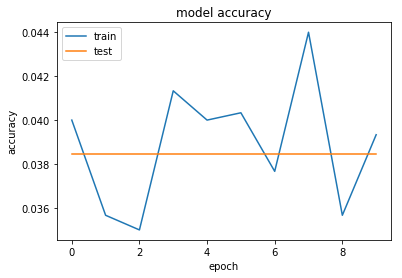

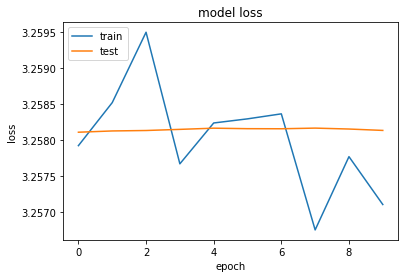

In [7]:
plot_history(history)


quizzing best accuracy model...



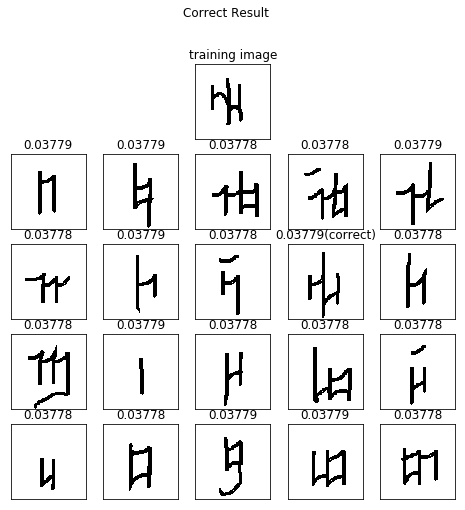

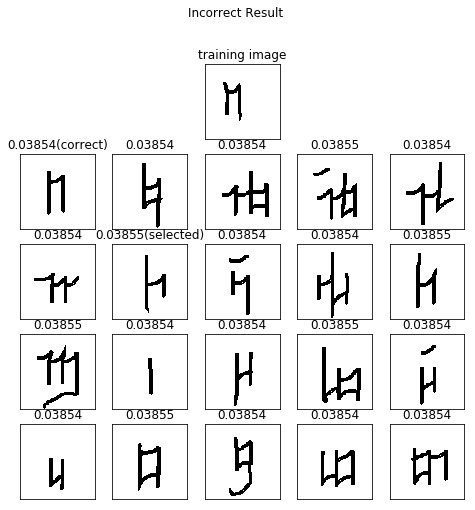

Quiz results: 21 out of 380 correct.
Quiz accuracy score: 0.055. Error rate: 0.945
Classification results: 15 out of 380 correct.
Classification accuracy score: 0.039. Error rate: 0.961

quizzing best loss model...

Quiz results: 29 out of 380 correct.
Quiz accuracy score: 0.076. Error rate: 0.924
Classification results: 15 out of 380 correct.
Classification accuracy score: 0.039. Error rate: 0.961

quizzing overfit model...

Quiz results: 39 out of 380 correct.
Quiz accuracy score: 0.103. Error rate: 0.897
Classification results: 12 out of 380 correct.
Classification accuracy score: 0.032. Error rate: 0.968


In [8]:
results1, results2, results3 = quiz_models(directory, test, labels, visualize=True, train_df=train)

In [9]:
capsnet, eval_model, manipulate_model = make_capsnet(
    input_shape, 
    n_class, 
    routings, 
    reconstruction_loss, 
    lambda_downweight=.35
)
capsnet.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 105, 105, 1)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 128)  15616       input_2[0][0]                    
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 44, 44, 256)  819456      conv1[0][0]                      
__________________________________________________________________________________________________
primarycap_conv2d (Conv2D)      (None, 18, 18, 256)  5308672     conv2[0][0]                      
__________________________________________________________________________________________________
primarycap

In [10]:
loss_tracker = LossTracker(scale_by=.1)
tg = train_gen(train, labels, batch_size=batch_size, augmentation=True, loss_obj=loss_tracker)
vg = val_gen(test, labels, batch_size=batch_size)
val_steps = len(test)//batch_size
history = train_capsnet(capsnet, tg, vg, directory, verbose=True, loss_obj=loss_tracker, validation_steps=val_steps, epochs=100)

Epoch 1/100
100/100 [==============================] - 162s 2s/step - loss: 0.9221 - capsnet_loss: 0.8827 - decoder_loss: 0.1004 - capsnet_categorical_accuracy: 0.0337 - val_loss: 0.8344 - val_capsnet_loss: 0.8100 - val_decoder_loss: 0.0622 - val_capsnet_categorical_accuracy: 0.0167

Epoch 00001: val_capsnet_categorical_accuracy improved from -inf to 0.01667, saving model to ./models/images_evaluation/Atemayar_Qelisayer/best_acc_caps.h5

Epoch 00001: val_loss improved from inf to 0.83439, saving model to ./models/images_evaluation/Atemayar_Qelisayer/best_loss_caps.h5
Epoch 2/100
100/100 [==============================] - 155s 2s/step - loss: 0.7009 - capsnet_loss: 0.6816 - decoder_loss: 0.0492 - capsnet_categorical_accuracy: 0.0420 - val_loss: 0.6043 - val_capsnet_loss: 0.5811 - val_decoder_loss: 0.0591 - val_capsnet_categorical_accuracy: 0.0396

Epoch 00002: val_capsnet_categorical_accuracy improved from 0.01667 to 0.03958, saving model to ./models/images_evaluation/Atemayar_Qelisayer

Epoch 16/100
100/100 [==============================] - 153s 2s/step - loss: 0.0422 - capsnet_loss: 0.0267 - decoder_loss: 0.0396 - capsnet_categorical_accuracy: 0.9900 - val_loss: 0.3689 - val_capsnet_loss: 0.3471 - val_decoder_loss: 0.0556 - val_capsnet_categorical_accuracy: 0.5458

Epoch 00016: val_capsnet_categorical_accuracy did not improve from 0.55208

Epoch 00016: val_loss did not improve from 0.36790
Epoch 17/100
100/100 [==============================] - 155s 2s/step - loss: 0.0405 - capsnet_loss: 0.0252 - decoder_loss: 0.0390 - capsnet_categorical_accuracy: 0.9913 - val_loss: 0.3717 - val_capsnet_loss: 0.3500 - val_decoder_loss: 0.0554 - val_capsnet_categorical_accuracy: 0.5333

Epoch 00017: val_capsnet_categorical_accuracy did not improve from 0.55208

Epoch 00017: val_loss did not improve from 0.36790
Epoch 18/100
100/100 [==============================] - 153s 2s/step - loss: 0.0369 - capsnet_loss: 0.0216 - decoder_loss: 0.0390 - capsnet_categorical_accuracy: 0.9963 - val


Epoch 00032: val_loss improved from 0.33595 to 0.33446, saving model to ./models/images_evaluation/Atemayar_Qelisayer/best_loss_caps.h5
Epoch 33/100
100/100 [==============================] - 147s 1s/step - loss: 0.0260 - capsnet_loss: 0.0112 - decoder_loss: 0.0376 - capsnet_categorical_accuracy: 0.9967 - val_loss: 0.3378 - val_capsnet_loss: 0.3165 - val_decoder_loss: 0.0543 - val_capsnet_categorical_accuracy: 0.5979

Epoch 00033: val_capsnet_categorical_accuracy did not improve from 0.60625

Epoch 00033: val_loss did not improve from 0.33446
Epoch 34/100
100/100 [==============================] - 150s 2s/step - loss: 0.0247 - capsnet_loss: 0.0103 - decoder_loss: 0.0370 - capsnet_categorical_accuracy: 0.9970 - val_loss: 0.3336 - val_capsnet_loss: 0.3124 - val_decoder_loss: 0.0542 - val_capsnet_categorical_accuracy: 0.5917

Epoch 00034: val_capsnet_categorical_accuracy did not improve from 0.60625

Epoch 00034: val_loss improved from 0.33446 to 0.33364, saving model to ./models/images_


Epoch 00050: val_capsnet_categorical_accuracy did not improve from 0.62708

Epoch 00050: val_loss did not improve from 0.32427
Epoch 51/100
100/100 [==============================] - 156s 2s/step - loss: 0.0233 - capsnet_loss: 0.0090 - decoder_loss: 0.0364 - capsnet_categorical_accuracy: 0.9973 - val_loss: 0.3285 - val_capsnet_loss: 0.3073 - val_decoder_loss: 0.0540 - val_capsnet_categorical_accuracy: 0.6146

Epoch 00051: val_capsnet_categorical_accuracy did not improve from 0.62708

Epoch 00051: val_loss did not improve from 0.32427
Epoch 52/100
100/100 [==============================] - 154s 2s/step - loss: 0.0236 - capsnet_loss: 0.0090 - decoder_loss: 0.0371 - capsnet_categorical_accuracy: 0.9977 - val_loss: 0.3273 - val_capsnet_loss: 0.3061 - val_decoder_loss: 0.0540 - val_capsnet_categorical_accuracy: 0.6188

Epoch 00052: val_capsnet_categorical_accuracy did not improve from 0.62708

Epoch 00052: val_loss did not improve from 0.32427
Epoch 53/100
100/100 [========================

KeyboardInterrupt: 

In [ ]:
plot_history(history, model_name='capsnet', capsnet=True)


quizzing best accuracy model...



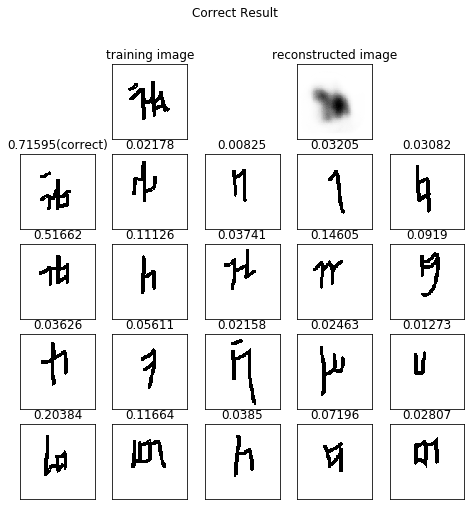

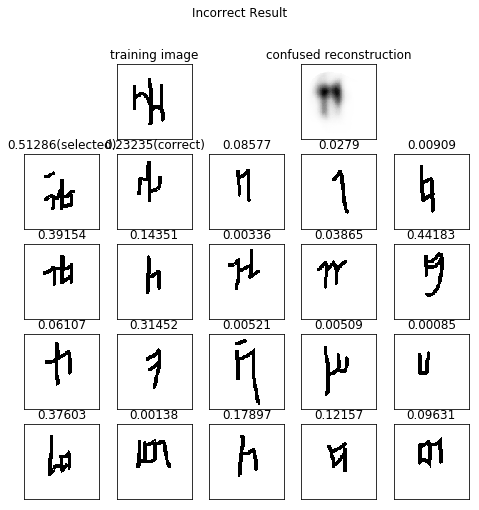

Quiz results: 248 out of 380 correct.
Quiz accuracy score: 0.653. Error rate: 0.347
Classification results: 233 out of 380 correct.
Classification accuracy score: 0.613. Error rate: 0.387

quizzing best loss model...

Quiz results: 269 out of 380 correct.
Quiz accuracy score: 0.708. Error rate: 0.292
Classification results: 244 out of 380 correct.
Classification accuracy score: 0.642. Error rate: 0.358

quizzing overfit model...



ValueError: Cannot feed value of shape (128, 1, 15, 15) for Tensor 'Placeholder_184:0', which has shape '(11, 11, 1, 128)'

In [11]:
results_caps1, results_caps2, results_caps3 = quiz_models(
    directory, 
    test, 
    labels, 
    capsnet=True, 
    visualize=True,
    eval_model=eval_model,
    train_df=train
)

In [ ]:
manipulate_model.set_weights(capsnet.get_weights())
eval_model.set_weights(capsnet.get_weights())

In [ ]:
def get_pieces(capsnet):
    """Takes a capsnet and returns encoder,
    squisher, and decoder, which are all
    pieces of the network, for experimentation."""
    encoder = Sequential()
    for layer in capsnet.layers[:-4]:
        encoder.add(layer)
        
    decoder = Sequential()
    decoder.add(capsnet.layers[-1])
    
    shape = encoder.outputs[0].shape
    inputs = Input(shape=shape)
    outputs = capsnet.layers[-2](inputs)
    squasher = Model(inputs=inputs, outputs=outputs)
    return encoder, squasher, decoder

encoder, squasher, decoder = get_pieces(capsnet)

In [ ]:
#X, Y = next(vg)
idx = 0
encodings = encoder.predict(X)
sess = tf.Session()
with sess.as_default():
    encodings_ts = tf.convert_to_tensor(encodings)
    lengths = Length()(encodings_ts)
    lengths = lengths.eval()
prediction = np.argmax(lengths, axis=1)
correct_class = np.argmax(Y, axis=1)
decoder.predict(lengths[idx, prediction]).shape

In [ ]:
idx = 5
plt.title('input image')
plt.imshow(X[idx, :, :, 0], cmap='Greys_r')
plt.show();
masked = np.zeros(shape=(26, 16))
masked[prediction[idx], :] = encodings[idx, prediction[idx], :]
flat = masked.flatten()
plt.title('predicted class reconstruction')
plt.imshow(decoder.predict(np.array([flat]))[0, :, :, 0], cmap='Greys_r')
plt.show();
masked = np.zeros(shape=(26, 16))
masked[correct_class[idx], :] = encodings[idx, correct_class[idx], :]
flat = masked.flatten()
plt.title('true class reconstruction')
plt.imshow(decoder.predict(np.array([flat]))[0, :, :, 0], cmap='Greys_r')
plt.show();
flat = encodings[idx, :].flatten()
plt.title('quilombo')
plt.imshow(decoder.predict(np.array([flat]))[0, :, :, 0], cmap='Greys_r')
plt.show();

In [ ]:
plt.imshow(decoder.predict(np.array([flat]))[0, :, :, 0])